In [1]:
import pandas as pd

In [2]:
url = '../dataset/'
df = pd.read_csv(url+'dataset_light.csv')

# user 세분화

## session 탐색

In [6]:
cpy = df[['user_id','user_session']].copy()

In [7]:
cpy_1 = cpy.drop_duplicates(subset=['user_session'])

In [8]:
cpy_1['user_id'].value_counts()

514649263    2336
563459593    1618
561163588    1182
548931675     681
556593461     669
             ... 
525901986       1
561255479       1
557310339       1
561255557       1
512458378       1
Name: user_id, Length: 999995, dtype: int64

<AxesSubplot:>

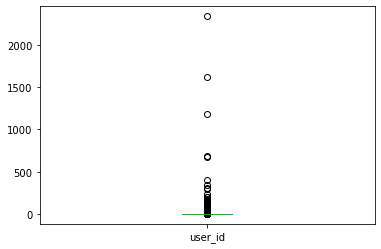

In [9]:
cpy_1['user_id'].value_counts().plot(kind='box')

In [10]:
df.loc[df['user_id'] == 514649263]

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,first_level,secont_level,third_level
4672,view,7005190,2053013560346280633,belecoo,183.21,514649263,90-52a7a28f710,2019-10-01,02:44:02,kids,carriage,carriage
15395,view,7004492,2053013560346280633,belecoo,102.46,514649263,cc-ffab269bce4,2019-10-01,03:28:10,kids,carriage,carriage
15548,view,7005394,2053013560346280633,belecoo,163.35,514649263,43-d9f41176c6b,2019-10-01,03:28:46,kids,carriage,carriage
15670,view,7005751,2053013560346280633,etc,79.46,514649263,f1-409ca523b52,2019-10-01,03:29:13,kids,carriage,carriage
19502,view,7005190,2053013560346280633,belecoo,183.18,514649263,2c-6195b887d1a,2019-10-01,03:42:54,kids,carriage,carriage
...,...,...,...,...,...,...,...,...,...,...,...,...
13929132,view,7006559,2053013560346280633,belecoo,175.20,514649263,4e-94d1e4b6328,2019-10-31,15:35:27,kids,carriage,carriage
13929284,view,7002254,2053013560346280633,wingoffly,115.13,514649263,b8-57d3f9f9aab,2019-10-31,15:35:46,kids,carriage,carriage
13929423,view,7002255,2053013560346280633,wingoffly,113.34,514649263,82-a1eaa5ffcbf,2019-10-31,15:36:02,kids,carriage,carriage
13947710,view,7005189,2053013560346280633,belecoo,169.40,514649263,04-12011c22bb7,2019-10-31,16:12:36,kids,carriage,carriage


세션의 수가 유의미하게 많은 user id를 살펴보니 시간대로 확인해보면 세션값이 제대로 저장되지 않은 듯 하다
* session에 대한 전처리가 있던지 다른 방법으로 유저를 세분화 해야할 듯 하다

## event-type

In [3]:
cpy = df[['user_id','event_type']].copy()

In [4]:
event = cpy.groupby(['user_id','event_type']).size().reset_index().sort_values('user_id')

In [5]:
event

,user_id,event_type,0
0,33869381,view,1
1,64078358,view,1
2,200673532,view,4
3,205053188,view,2
4,208669541,view,2
...,...,...,...
1226995,566280241,view,1
1226996,566280291,cart,2
1226997,566280291,view,1
1226998,566280416,view,1


In [6]:
event_cnt = event.pivot(index='user_id', columns='event_type', values=0).fillna(0).reset_index()

In [7]:
event_cnt

event_type,user_id,cart,purchase,view
0,33869381,0.0,0.0,1.0
1,64078358,0.0,0.0,1.0
2,200673532,0.0,0.0,4.0
3,205053188,0.0,0.0,2.0
4,208669541,0.0,0.0,2.0
...,...,...,...,...
999995,566279973,0.0,0.0,7.0
999996,566280241,0.0,0.0,1.0
999997,566280291,2.0,0.0,1.0
999998,566280416,0.0,0.0,1.0


In [9]:
event_cnt.describe()

event_type,user_id,cart,purchase,view
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,5.404871e+08,0.306242,0.244476,13.501772
std,1.945030e+07,1.595533,1.336184,31.374313
min,3.386938e+07,0.000000,0.000000,0.000000
25%,5.205861e+08,0.000000,0.000000,2.000000
50%,5.442440e+08,0.000000,0.000000,4.000000
75%,5.582844e+08,0.000000,0.000000,13.000000
max,5.662805e+08,255.000000,165.000000,4011.000000


In [20]:
event_cnt.loc[event_cnt['purchase'] > 20 ]

event_type,user_id,cart,purchase,view
7467,512372673,4.0,55.0,172.0
7530,512373849,4.0,35.0,562.0
8183,512384696,4.0,30.0,111.0
8500,512389601,8.0,28.0,72.0
9379,512404405,1.0,22.0,142.0
...,...,...,...,...
912878,563255504,31.0,22.0,330.0
923992,563599039,9.0,43.0,70.0
954809,564580766,24.0,22.0,58.0
960929,564769842,20.0,39.0,78.0


In [7]:
total_purchase = df[['user_id','event_type','price']][df['event_type']=='purchase'].groupby('user_id').sum().reset_index()

In [8]:
df_user = df['user_id'].drop_duplicates().sort_values().to_frame()

In [86]:
merge1 = pd.merge(df_user,event_cnt, on='user_id',how='left')

In [88]:
merge2 = pd.merge(merge1,total_purchase, on='user_id', how='left')

In [91]:
merge2.fillna(0, inplace=True)

In [93]:
# merge2.to_csv(url+'id_info.csv',index=False)

---

# purchase 탐색

## 시간대에 따른 이벤트

In [77]:
cpy = df[['time','event_type']].copy()

In [78]:
cpy['time'] = cpy['time'].apply(lambda x: x[:5])

In [79]:
by_time_sec = cpy.groupby(['time','event_type']).size().reset_index().pivot(index='time',columns='event_type',values=0)
by_time_sec

event_type,cart,purchase,view
time,,,
00:00,14,8,1165
00:01,23,15,1174
00:02,17,10,1204
00:03,15,11,1196
00:04,9,6,1241
...,...,...,...
23:55,28,16,1274
23:56,19,20,1181
23:57,9,13,1197


In [80]:
# by_time_sec.to_csv(url+'by_time_sec.csv')

In [81]:
cpy['time'] = cpy['time'].apply(lambda x: x[:2])

In [82]:
by_time_min = cpy.groupby(['time','event_type']).size().reset_index().pivot(index='time',columns='event_type',values=0)
by_time_min

event_type,cart,purchase,view
time,,,
00,1286,944,98627
01,2612,1809,179107
02,5877,4662,343037
03,11874,9798,490950
04,15812,13540,600828
05,18670,15811,673691
06,20916,17173,713193
07,21597,17604,734107
08,21871,18069,749357


In [83]:
# by_time_min.to_csv(url+'by_time_min.csv')

## 날짜에 따른 이벤트

In [71]:
cpy = df[['date','event_type']].copy()

In [72]:
cpy['date'] = cpy['date'].apply(lambda x: x[-2:])

In [75]:
by_date = cpy.groupby(['date','event_type']).size().reset_index().pivot(index='date',columns='event_type',values=0)
by_date

event_type,cart,purchase,view
date,,,
01,5417,6277,400752
02,5731,6374,381380
03,6340,6288,357952
04,14480,8790,445176
05,11525,7761,422256
06,10698,7266,416806
07,5836,7000,382289
08,6002,7511,436312
09,6108,7553,431159


In [76]:
# by_date.to_csv(url+'by_date.csv')

In [24]:
cpy = df[['date','user_id','event_type']]
cpy

,date,user_id,event_type
0,2019-10-01,554748717,view
1,2019-10-01,512742880,view
2,2019-10-01,550978835,view
3,2019-10-01,555158050,view
4,2019-10-01,512742880,view
...,...,...,...
14052485,2019-10-31,566031393,view
14052486,2019-10-31,543124499,view
14052487,2019-10-31,551943550,view
14052488,2019-10-31,557202408,view


In [49]:
cpy_1 = cpy.groupby(['date','user_id','event_type']).size().to_frame().reset_index()

In [100]:
cpy_2 = cpy_1.loc[cpy_1['date']=='2019-10-01'].pivot(index='user_id',columns='event_type',values=0).fillna(0)

In [93]:
cpy_2

event_type,cart,purchase,view,v_to_c,v_to_p,c_to_p
user_id,,,,,,
295655799,0.0,0.0,1.0,0.0,0.0,NaN
315309190,0.0,0.0,1.0,0.0,0.0,NaN
351866718,0.0,0.0,1.0,0.0,0.0,NaN
353623668,0.0,0.0,1.0,0.0,0.0,NaN
353733558,0.0,0.0,2.0,0.0,0.0,NaN
...,...,...,...,...,...,...
555814229,0.0,0.0,2.0,0.0,0.0,NaN
555814722,0.0,0.0,1.0,0.0,0.0,NaN
555814826,0.0,0.0,1.0,0.0,0.0,NaN


In [101]:
cpy_2.head()

event_type,cart,purchase,view
user_id,,,
295655799,0.0,0.0,1.0
315309190,0.0,0.0,1.0
351866718,0.0,0.0,1.0
353623668,0.0,0.0,1.0
353733558,0.0,0.0,2.0


* view to cart, view to purchase, cart to purchase

---

## 카테고리 탐색

In [3]:
df

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,first_level,secont_level,third_level
0,view,3900821,2053013552326770905,aqua,33.20,554748717,57-6336556b0fc,2019-10-01,00:00:00,appliances,environment,water_heater
1,view,1480613,2053013561092866779,pulser,908.62,512742880,a5-86594dec0db,2019-10-01,00:00:05,computers,desktop,desktop
2,view,31500053,2053013558031024687,luminarc,41.16,550978835,a7-abc6048498d,2019-10-01,00:00:08,empty,empty,empty
3,view,2900536,2053013554776244595,elenberg,51.46,555158050,9e-9ce44bb50ab,2019-10-01,00:00:11,appliances,kitchen,microwave
4,view,1480714,2053013561092866779,pulser,921.49,512742880,a5-86594dec0db,2019-10-01,00:00:22,computers,desktop,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
14052485,view,1004708,2053013555631882655,huawei,151.99,566031393,5c-cee9c52ab9a,2019-10-31,23:59:53,electronics,smartphone,smartphone
14052486,view,1480709,2053013561092866779,pulser,592.01,543124499,25-9a0d43297f9,2019-10-31,23:59:55,computers,desktop,desktop
14052487,view,5800263,2053013553945772349,alphard,92.67,551943550,3c-e04aa3163bb,2019-10-31,23:59:55,electronics,audio,subwoofer
14052488,view,1005008,2053013555631882655,xiaomi,94.46,557202408,61-ac70ff0c66e,2019-10-31,23:59:56,electronics,smartphone,smartphone


In [3]:
cpy = df[['date','time','user_id','product_id','first_level','event_type']].copy()
cpy

,date,time,user_id,product_id,first_level,event_type
0,2019-10-01,00:00:00,554748717,3900821,appliances,view
1,2019-10-01,00:00:05,512742880,1480613,computers,view
2,2019-10-01,00:00:08,550978835,31500053,empty,view
3,2019-10-01,00:00:11,555158050,2900536,appliances,view
4,2019-10-01,00:00:22,512742880,1480714,computers,view
...,...,...,...,...,...,...
14052485,2019-10-31,23:59:53,566031393,1004708,electronics,view
14052486,2019-10-31,23:59:55,543124499,1480709,computers,view
14052487,2019-10-31,23:59:55,551943550,5800263,electronics,view
14052488,2019-10-31,23:59:56,557202408,1005008,electronics,view


In [5]:
cpy_1 = cpy[cpy['date']=='2019-10-01'].sort_values(['user_id','product_id'])[['user_id','product_id','first_level','event_type']]
cpy_1

,user_id,product_id,first_level,event_type
326346,295655799,6400036,computers,view
300660,315309190,26401109,empty,view
35825,351866718,16900161,furniture,view
177633,353623668,13103620,empty,view
267465,353733558,2600164,empty,view
...,...,...,...,...
412232,555814229,1003318,electronics,view
412408,555814722,1004565,electronics,view
412400,555814826,21400508,electronics,view
412390,555814927,2601299,empty,view


---

In [24]:
for date in cpy['date'].drop_duplicates():
    globals()['date_'+str(date[-2:])] = {}
    da = cpy[cpy['date'] == date].sort_values(['user_id','product_id'])[['user_id','product_id','first_level','event_type']]
    for user_id in da['user_id'].drop_duplicates(): #유저 id 고유값으로 기록 검색 
        user = da[da['user_id']==user_id] #유저 id로 기록 검색
        for product_id in user['product_id'].drop_duplicates(): # 유저 id 기록 내에 productid별로 검색
            product = user[user['product_id']==product_id] 
            event_len = len(product[product['product_id']==product_id].event_type.drop_duplicates()) # 상품별 행동의 개수
            category = product.first_level.drop_duplicates().values[0] # 해당 상품의 1분류
            try:
                globals()['date_'+str(date[-2:])][category] += event_len
            except:
                globals()['date_'+str(date[-2:])][category] = event_len



In [74]:
category_list = cpy['first_level'].drop_duplicates().to_list()
res = pd.DataFrame(columns=category_list)

In [56]:
date_list = []
for date in cpy['date'].drop_duplicates():
    date_list.append('date_'+str(date[-2:]))

In [ ]:
for i in date_list:
    res = res.append(globals()[i],ignore_index=True)

In [ ]:
date_list = []
for date in cpy['date'].drop_duplicates():
    date_list.append(date)

In [80]:
res['date'] = date_list

In [83]:
res = res[['date','appliances','computers','electronics','apparel','furniture','auto','construction','kids','accessories','sport','country_yard','medicine','stationery','empty']]

In [84]:
# res.to_csv(url+'category.csv',index=False)

In [85]:
res

,date,appliances,computers,electronics,apparel,furniture,auto,construction,kids,accessories,sport,country_yard,medicine,stationery,empty
0,2019-10-01,26848,14729,101369,10317,7953,6278,5111,3442,1924,1203,124,77,29,92919
1,2019-10-02,26878,13354,98051,9052,6773,5625,4361,3400,1913,1228,113,70,42,84791
2,2019-10-03,24821,13173,94323,7302,5829,5422,4105,3225,1369,1205,99,48,44,76945
3,2019-10-04,35878,16211,115140,7373,5919,10464,4166,3574,1665,1245,77,59,21,96116
4,2019-10-05,31406,14737,104890,8057,7105,10191,3796,3174,1565,1302,89,42,36,95558
5,2019-10-06,31441,14821,103406,7810,6475,8884,3955,3196,1886,1243,97,45,28,95110
6,2019-10-07,25487,12841,93674,7593,6452,8322,3686,3102,1617,1123,69,53,21,91360
7,2019-10-08,27294,13595,97559,9916,7198,13132,4341,3387,2071,1248,110,57,29,117253
8,2019-10-09,27016,14373,98793,10819,7150,10681,4641,3239,2053,1144,117,43,51,111840
9,2019-10-10,27855,14271,99253,9668,6586,7852,3952,3699,2244,1051,110,86,36,98853
